# Week 3: Grouping

In [2]:
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [4]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [5]:
penguins['flipper_length_mm'].mean()

200.91520467836258

In [6]:
penguins.groupby('species')['flipper_length_mm']

In [7]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [8]:
# Average flipper length per species
avg_flipper = (penguins.groupby("species")
                        .flipper_length_mm
                        .mean()
                        .rename('mean_flipper_length')
                        .sort_values(ascending=False)
                        )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

In [9]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [10]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

<AxesSubplot:title={'center':'Penguins surveyed at the Palmer Archipelago'}, ylabel='island,year'>

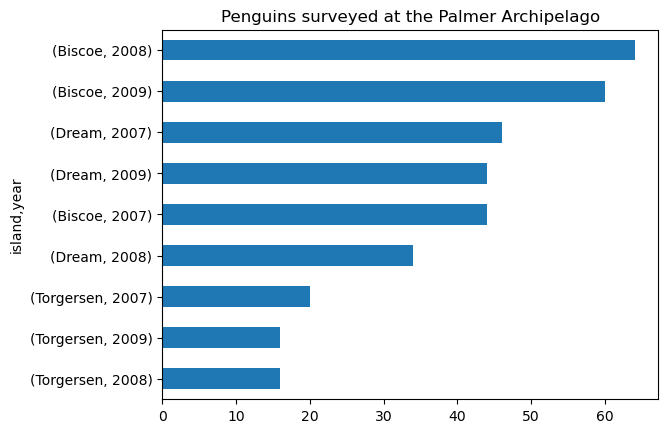

In [11]:
(penguins.groupby(['island','year'])
         .count()
         .species
         .sort_values()
         .plot(kind='barh',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )

In [12]:
penguins.groupby('species')['body_mass_g'].max()

species
Adelie       4775.0
Chinstrap    4800.0
Gentoo       6300.0
Name: body_mass_g, dtype: float64

In [13]:
penguins.groupby('year')['body_mass_g'].max()

year
2007    6300.0
2008    6000.0
2009    6000.0
Name: body_mass_g, dtype: float64

## Check-in

In [22]:
(penguins.groupby(['species','year'])
         .body_mass_g
         .max()
         .rename("max_body_mass_g"))

species    year
Adelie     2007    4675.0
           2008    4700.0
           2009    4775.0
Chinstrap  2007    4400.0
           2008    4800.0
           2009    4450.0
Gentoo     2007    6300.0
           2008    6000.0
           2009    6000.0
Name: max_body_mass_g, dtype: float64

Text(0.5, 0, 'Body Mass (g)')

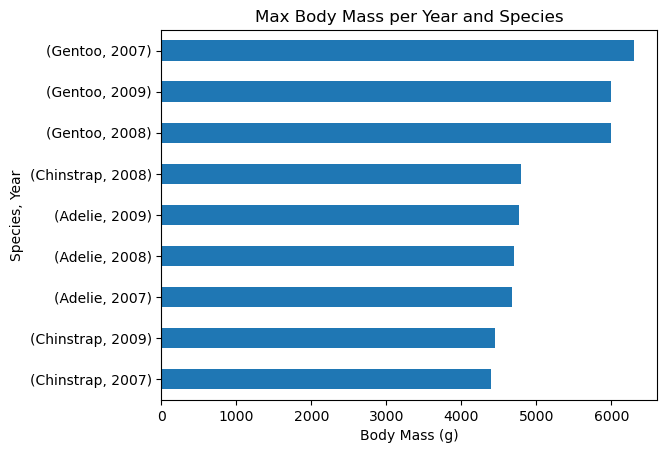

In [19]:
((penguins.groupby(['species','year'])
         ['body_mass_g'].max())
        .sort_values()
         .plot(kind='barh',
              title = 'Max Body Mass per Year and Species',
              xlabel = ('Species, Year'))
        .set_xlabel(xlabel="Body Mass (g)"))
